# EXPLORATORY DATA ANALYSIS - STOCK MARKET ANALYSIS AND PREDICTION

### Problem Statement: Analyze stock price trends and identify patterns that affect price fluctuations.

#### Dataset: S&P 500 Historical Data - Yahoo Finance API(yfinance) 
About Data set: This contains historical stock market data obtained from Yahoo Finance. This includes daily stock prices, trading volume, and other relevant metrics for a specific stock. The data is collected over a period. The dataset is used to analyze the stock's performance, identify trends, and make predictions about future stock.

### Column Name	and Description:

Date: The trading date (index in the dataset).

Open: The price at which the stock opened on that day.

High: The highest price reached during the trading session.

Low: The lowest price reached during the trading session.

Close: The price at which the stock closed for the day.

Adj Close: The adjusted closing price after accounting for dividends and stock splits.

Volume: The total number of shares traded on that day.

### Use cases:

- Investment Decision Making
- Risk Management and Portfolio Optimization
- Market Trend Analysis and Sentiment Prediction
- Economic and Policy Analysis
- Fraud Detection and Inside Trading Monitoring


In [22]:
# Importing necessary libraries

import pandas as pd 
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [23]:
# Fetch Data for S&P 500 Index
# We will use Yahoo Finance API to fetch historic stock data of Apple Inc.

stock_symbol = 'AAPL' # Apple Inc.
start_date = '2015-01-01'
end_date = '2024-01-01'

data = yf.download(stock_symbol, start=start_date, end=end_date)

data.head() # Display the first few rows of the data

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2015-01-02,24.347168,24.817053,23.906233,24.805918,212818400
2015-01-05,23.661270,24.195737,23.474208,24.115567,257142000
2015-01-06,23.663498,23.924050,23.300505,23.725852,263188400
2015-01-07,23.995308,24.095520,23.761478,23.872825,160423600
2015-01-08,24.917267,24.975168,24.206871,24.324901,237458000


In [24]:
# Basic Information about the Dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2264 entries, 2015-01-02 to 2023-12-29
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, AAPL)   2264 non-null   float64
 1   (High, AAPL)    2264 non-null   float64
 2   (Low, AAPL)     2264 non-null   float64
 3   (Open, AAPL)    2264 non-null   float64
 4   (Volume, AAPL)  2264 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 106.1 KB


As we can see there are no missing values in the data

In [25]:
# Summary Statistics
data.describe()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
count,2264.000000,2264.000000,2264.000000,2264.000000,2.264000e+03
mean,81.762838,82.591096,80.852235,81.694108,1.237607e+08
std,56.244112,56.820024,55.606246,56.189211,6.818458e+07
min,20.697266,21.001973,20.497946,20.619369,2.404830e+07
25%,32.963116,33.160179,32.781158,32.975317,7.831732e+07
50%,51.452511,52.267487,51.076532,51.600034,1.056556e+08
75%,139.646381,141.340194,137.134184,139.587630,1.486811e+08
max,197.144180,198.646813,196.039598,197.054623,6.488252e+08


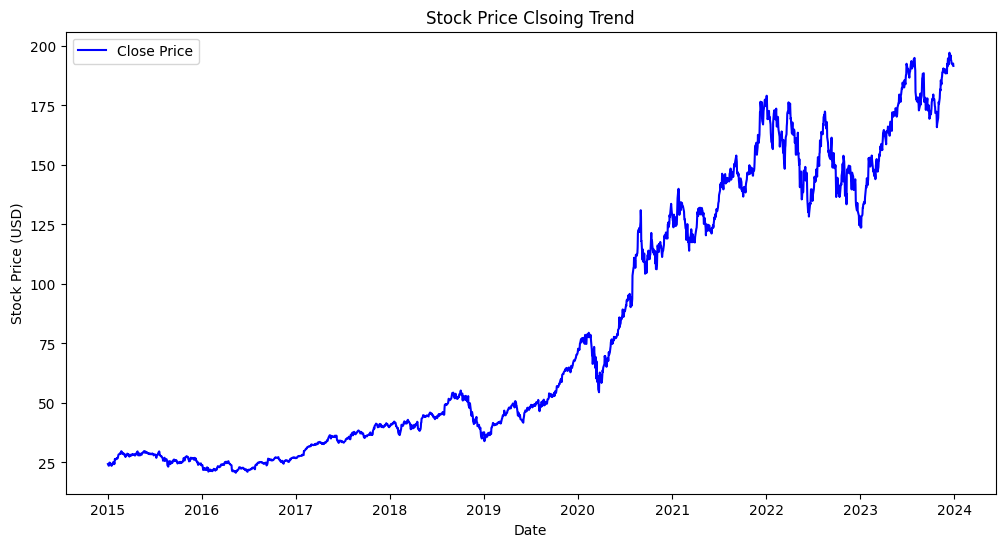

In [26]:
# Visualizing the stock price trends

plt.figure(figsize=(12,6))
plt.plot(data.index, data['Close'], label ='Close Price', color='blue')
plt.xlabel('Date')
plt.ylabel('Stock Price (USD)')
plt.title('Stock Price Clsoing Trend')
plt.legend()
plt.show()


The stock price of Apple has shown an overall uptrend from 2015 to 2024. There is a significant growth after 2019 which was from the launch of iPhone 11. The stock price has shown a slight dip in 2020 due to the COVID-19 pandemic but has recovered since then. The stock price has shown a significant growth in 2021 and 2022.

In [27]:
# Calculating simple moving averages to smooth out price fluctuations

data['SMA_50'] = data['Close'].rolling(window=50).mean()
data['SMA_200'] = data['Close'].rolling(window=200).mean()

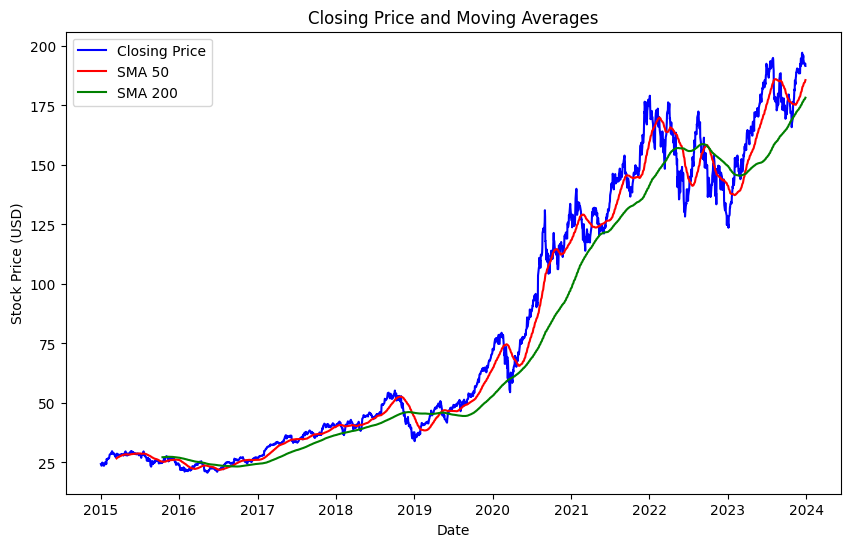

In [28]:
# Plotting the moving averages
plt.figure(figsize=(10,6))
plt.plot(data.index, data['Close'], label = 'Closing Price', color = 'blue')
plt.plot(data.index, data['SMA_50'], label = 'SMA 50', color = 'red')
plt.plot(data.index, data['SMA_200'], label = 'SMA 200', color = 'green')
plt.xlabel('Date')
plt.ylabel('Stock Price (USD)')
plt.title('Closing Price and Moving Averages')
plt.legend()
plt.show()


The Simple Moving Average shows the key trend shifts. In 2021, the 50-day SMA was above the 200-day SMA, indicating a bullish trend. However, in 2022, the 50-day SMA fell below the 200-day SMA, indicating a bearish trend temporarily.

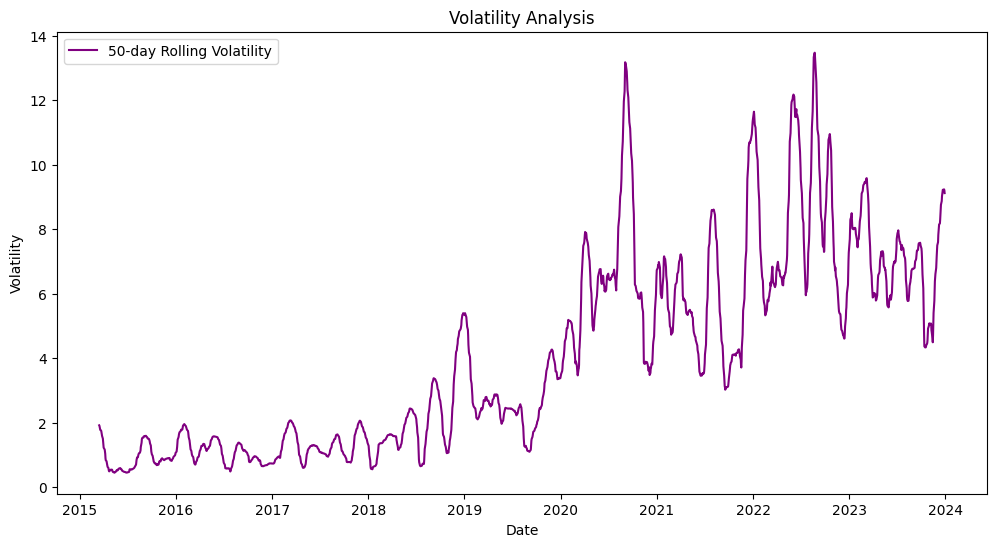

In [29]:
# Volatility Analysis to measure how much the stock price fluctuate

data['Volatility'] = data['Close'].rolling(window = 50).std()
plt.figure(figsize = (12,6))
plt.plot(data.index, data['Volatility'], label = '50-day Rolling Volatility', color = 'purple')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.title('Volatility Analysis')
plt.legend()
plt.show()

The volatility is highly seem during COVID Pandemic and during product launches else it is little stable.

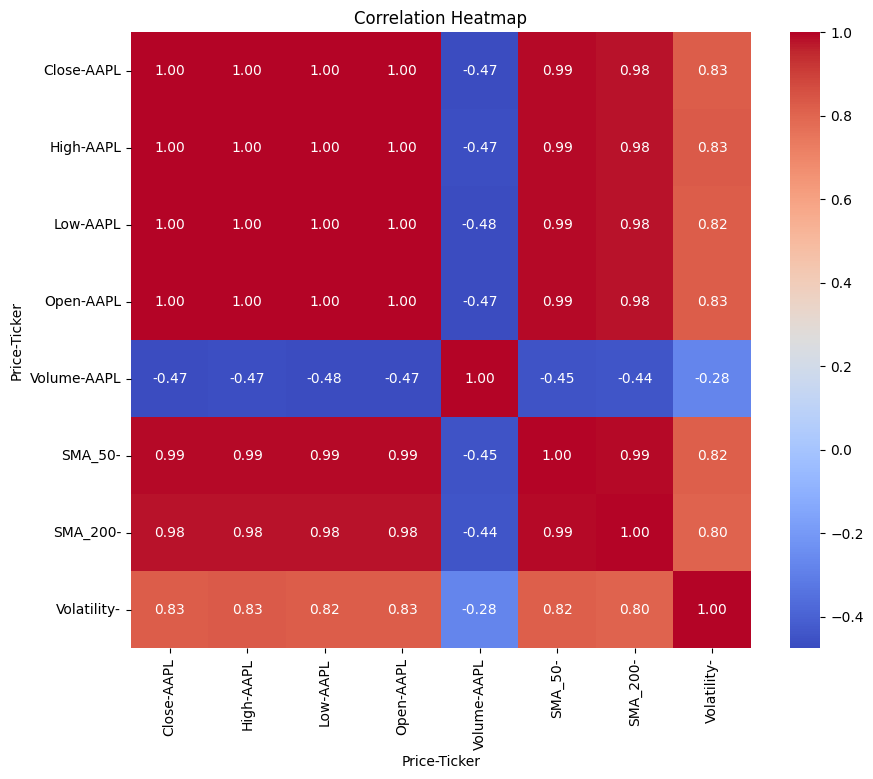

In [31]:
# Correlation Heatmap to check the correlation between the features
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot= True, cmap = 'coolwarm', fmt = '.2f')
plt.title('Correlation Heatmap')
plt.show()

The Open, High, Low and Close prices are highly correlated, but the volume has a weaker correlation with price attributes suggesting the trading volume doesn't affect the price as much as other factors. The correlation between the trading volume and the price attributes is relatively low.

## Key Takeaways:
- Apple has exhibited a storng long-term uptrend, with short-term corrections.
- In 2021, it was significantly bullish, and a temporary bearish trend in 2022.
- Volatility has been highest during global crisis.
- Volume has very less correlation with price attributes.